In [193]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from pathlib import Path
from scipy.stats import linregress
from scipy.stats import normaltest
from scipy.stats import ttest_ind
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [194]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,full_address,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,lat,long,zip_code
0,2326 LUAU ST MESQUITE TX 75150,3,1.5,1966,1356,8303,241183,32.798774,-96.649097,75150
1,1737 HIGHLAND ST MESQUITE TX 75149,3,1.0,1955,1454,7501,218014,32.787427,-96.609647,75149
2,2900 SIDNEY DR MESQUITE TX 75150,3,2.0,1972,1392,7196,241089,32.817247,-96.644125,75150
3,1507 RICHARD ST MESQUITE TX 75149,3,1.0,1957,1313,7501,205940,32.787413,-96.616575,75149
4,806 BRANDON DR SEAGOVILLE TX 75159,5,2.0,2004,1504,8407,275611,32.661589,-96.547004,75159


In [195]:
data = data.drop(columns=['full_address', 'lat', 'long'])
data.head()


,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,zip_code
0,3,1.5,1966,1356,8303,241183,75150
1,3,1.0,1955,1454,7501,218014,75149
2,3,2.0,1972,1392,7196,241089,75150
3,3,1.0,1957,1313,7501,205940,75149
4,5,2.0,2004,1504,8407,275611,75159


In [196]:
data.dtypes

beds                int64
baths             float64
year_built          int64
sq_ft_interior      int64
sq_ft_lot           int64
price               int64
zip_code            int64
dtype: object

In [197]:
# Get rid of the upper outliers
data = data[data['price'] <= 1500000]
data


,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,zip_code
0,3,1.5,1966,1356,8303,241183,75150
1,3,1.0,1955,1454,7501,218014,75149
2,3,2.0,1972,1392,7196,241089,75150
3,3,1.0,1957,1313,7501,205940,75149
4,5,2.0,2004,1504,8407,275611,75159
...,...,...,...,...,...,...,...
33203,2,2.0,2006,1362,304920,287949,75051
33204,3,2.0,1972,1774,9204,224423,75051
33205,3,1.5,1972,996,6277,231002,75051
33206,3,1.5,1964,1056,7854,221346,75051


In [198]:
data = data[data['baths'] <= 20]
data

,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,zip_code
0,3,1.5,1966,1356,8303,241183,75150
1,3,1.0,1955,1454,7501,218014,75149
2,3,2.0,1972,1392,7196,241089,75150
3,3,1.0,1957,1313,7501,205940,75149
4,5,2.0,2004,1504,8407,275611,75159
...,...,...,...,...,...,...,...
33203,2,2.0,2006,1362,304920,287949,75051
33204,3,2.0,1972,1774,9204,224423,75051
33205,3,1.5,1972,996,6277,231002,75051
33206,3,1.5,1964,1056,7854,221346,75051


## What relationships are there between the categorical and dependent variable (price)

In [189]:
# quick test for normality:
print(normaltest(data['price']))

NormaltestResult(statistic=14515.319651588492, pvalue=0.0)


In [190]:
# create a function for linear regression:
def line_reg(x,y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    reg_values = slope * x_values + intercept
    regline = 'Y = ' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
    plt.plot(x_values, reg_values, color='r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
    plt.legend()
    print(regline)
    print(f"The r value is {round(rvalue,3)}")

In [5]:
# create a function for the T test
def ttest(x,y):
    x_values = x
    y_values = y
    (statistic, pvalue) = ttest_ind(x_values,y_values)
    if pvalue < 0.05:
        print(f"P-Value {pvalue} < 0.05 therefore we reject the Ho, the regression value is statistically significant")
    else:
        print(f"P-value {round(pvalue, 2)} >= 0.05 therefore we fail to reject the Ho, Regression is NOT statistically significant")

Y = 121067.204x + -27304.204
The r value is 0.484
P-Value 0.0 < 0.05 therefore we reject the Ho, the regression value is statistically significant


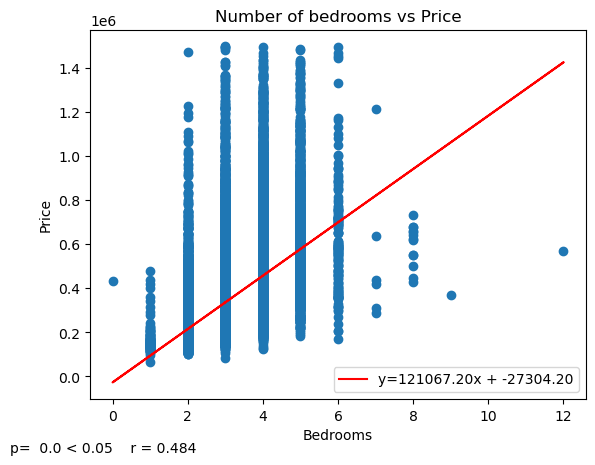

In [182]:
# plot price vs number of bedrooms

plt.scatter(data['beds'], data['price'])
line_reg(data['beds'], data['price'])
ttest(data['beds'], data['price'])
plt.title('Number of bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.figtext(x=0, y=0, s=f"p=  0.0 < 0.05    r = 0.484")

plt.show()


In [13]:
data['beds'].max()
# there's some weird house with 12 bedrooms

12

Y = 175727.6x + -10429.897
The r value is 0.733
P-Value 0.0 < 0.05 therefore we reject the Ho, the regression value is statistically significant


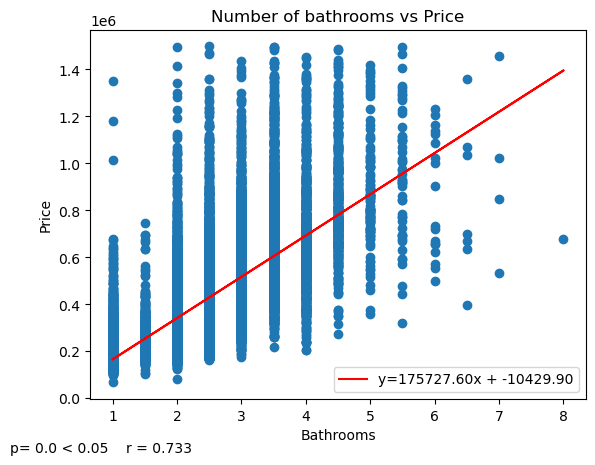

In [181]:
# price vs number of bathrooms

plt.scatter(data['baths'], data['price'])
line_reg(data['baths'], data['price'])
ttest(data['baths'], data['price'])
plt.title('Number of bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.figtext(x=0, y=0, s=f"p= 0.0 < 0.05    r = 0.733")

plt.show()

Y = 3675.742x + -6913386.921
The r value is 0.422
P-Value 0.0 < 0.05 therefore we reject the Ho, the regression value is statistically significant


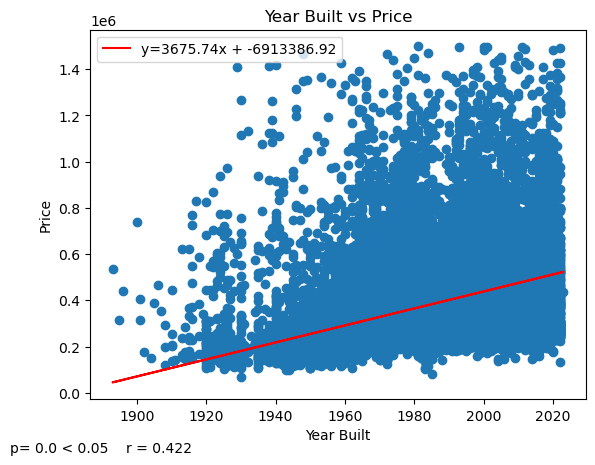

In [63]:
# price by year built

plt.scatter(data['year_built'], data['price'])
line_reg(data['year_built'], data['price'])
ttest(data['year_built'], data['price'])
plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.figtext(x=0, y=0, s=f"p= 0.0 < 0.05    r = 0.422")

plt.show()

Y = 178.158x + 24563.522
The r value is 0.807
P-Value 0.0 < 0.05 therefore we reject the Ho, the regression value is statistically significant


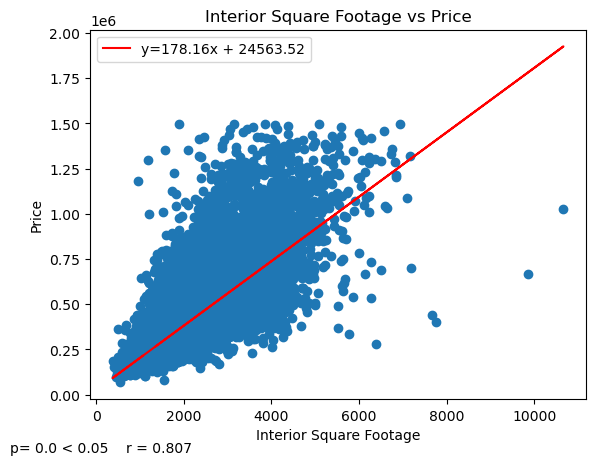

In [68]:
# interior square footage vs price

plt.scatter(data['sq_ft_interior'], data['price'])
line_reg(data['sq_ft_interior'], data['price'])
ttest(data['sq_ft_interior'], data['price'])
plt.title('Interior Square Footage vs Price')
plt.xlabel('Interior Square Footage')
plt.ylabel('Price')
plt.figtext(x=0, y=0, s=f"p= 0.0 < 0.05    r = 0.807")

plt.show()

Y = 0.001x + 367692.777
The r value is 0.017
P-Value 1.064608176083258e-85 < 0.05 therefore we reject the Ho, the regression value is statistically significant


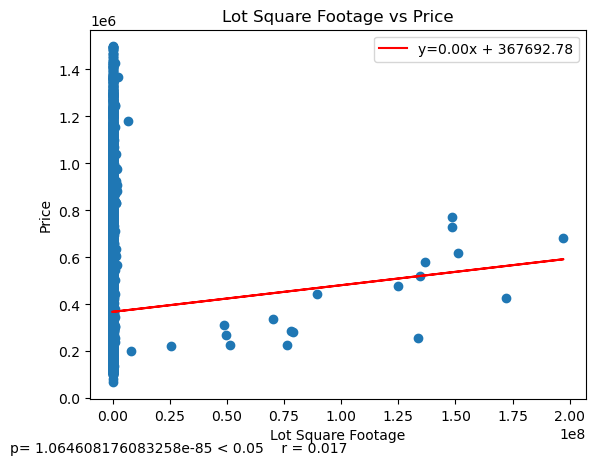

In [69]:
# lot square footage vs price

plt.scatter(data['sq_ft_lot'], data['price'])
line_reg(data['sq_ft_lot'], data['price'])
ttest(data['sq_ft_lot'], data['price'])
plt.title('Lot Square Footage vs Price')
plt.xlabel('Lot Square Footage')
plt.ylabel('Price')
plt.figtext(x=0, y=0, s=f"p= 1.064608176083258e-85 < 0.05    r = 0.017")

plt.show()

In [ ]:
# this one was weird

In [70]:
# price by zip code

#plt.scatter(data['zip_code'], data['price'])
#line_reg(data['zip_code'], data['price'])
#ttest(data['zip_code'], data['price'])
#plt.title('Zip Code vs Price')
#plt.xlabel('Zip Code')
#plt.ylabel('Price')
#plt.figtext(x=0, y=0, s=f"p= 2.91e-63 < 0.05    r = 0.805")

#plt.show()

In [199]:
data.head()

,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,zip_code
0,3,1.5,1966,1356,8303,241183,75150
1,3,1.0,1955,1454,7501,218014,75149
2,3,2.0,1972,1392,7196,241089,75150
3,3,1.0,1957,1313,7501,205940,75149
4,5,2.0,2004,1504,8407,275611,75159


In [200]:
print(data.corr())

                    beds     baths  year_built  sq_ft_interior  sq_ft_lot  \
beds            1.000000  0.635066    0.395833        0.672942   0.019274   
baths           0.635066  1.000000    0.556512        0.818216   0.019128   
year_built      0.395833  0.556512    1.000000        0.518626   0.010897   
sq_ft_interior  0.672942  0.818216    0.518626        1.000000   0.022896   
sq_ft_lot       0.019274  0.019128    0.010897        0.022896   1.000000   
price           0.483848  0.733087    0.421668        0.807444   0.017169   
zip_code       -0.012807  0.045210    0.006700        0.032654  -0.006677   

                   price  zip_code  
beds            0.483848 -0.012807  
baths           0.733087  0.045210  
year_built      0.421668  0.006700  
sq_ft_interior  0.807444  0.032654  
sq_ft_lot       0.017169 -0.006677  
price           1.000000  0.132298  
zip_code        0.132298  1.000000  


In [201]:
print(data.describe())

               beds         baths    year_built  sq_ft_interior     sq_ft_lot  \
count  32928.000000  32928.000000  32928.000000    32928.000000  3.292800e+04   
mean       3.263332      2.152241   1980.868926     1926.442329  7.193057e+04   
std        0.720891      0.752494     20.692910      817.514096  2.726465e+06   
min        0.000000      1.000000   1893.000000      375.000000  0.000000e+00   
25%        3.000000      2.000000   1966.000000     1341.000000  7.196000e+03   
50%        3.000000      2.000000   1980.000000     1747.000000  8.176000e+03   
75%        4.000000      2.500000   1999.000000     2300.000000  1.067700e+04   
max       12.000000      8.000000   2023.000000    10668.000000  1.972188e+08   

              price      zip_code  
count  3.292800e+04  32928.000000  
mean   3.677783e+05  75110.585277  
std    1.803795e+05     75.649745  
min    6.739000e+04  75001.000000  
25%    2.558230e+05  75043.000000  
50%    3.144600e+05  75089.000000  
75%    4.186765e+0

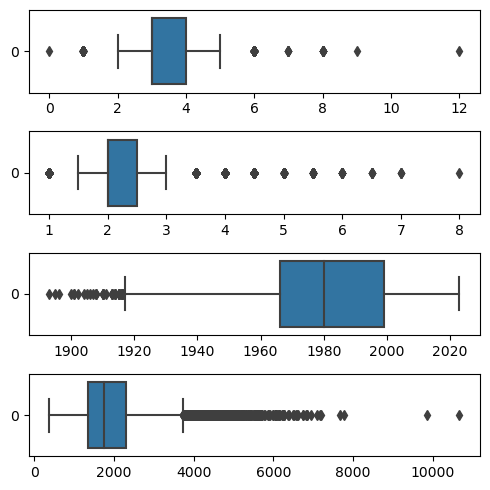

In [183]:
# checking for outliers
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(data['beds'], ax = axs[0], orient='h')
plt2 = sns.boxplot(data['baths'], ax = axs[1], orient='h')
plt3 = sns.boxplot(data['year_built'], ax = axs[2], orient='h')
plt4 = sns.boxplot(data['sq_ft_interior'], ax = axs[3], orient='h')
plt.tight_layout()


/var/folders/58/wf3rb_4174q5hgcffz8xp_640000gn/T/ipykernel_65233/2309002448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

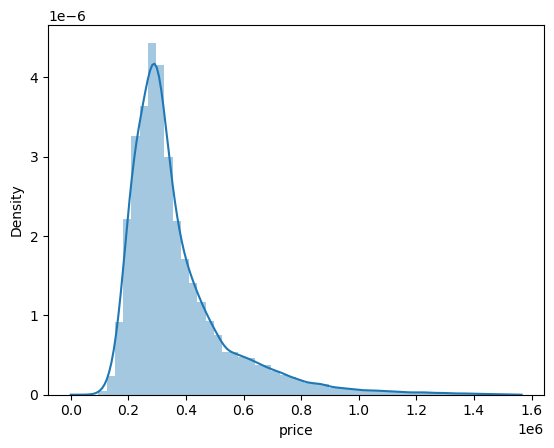

In [97]:
sns.distplot(data['price'])

In [254]:
# average price by zip code
data_zip = data.groupby('zip_code', as_index=False).mean()
data_zip_ordered = data_zip.sort_values(by=['price'], ascending=True)
data_zip_ordered

,zip_code,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price
45,75210,2.611111,1.500000,1956.000000,1169.444444,5931.277778,1.778683e+05
14,75060,2.230769,2.201923,1981.384615,1173.326923,3535.961538,1.854563e+05
35,75172,3.000000,2.000000,2003.000000,1007.000000,6564.000000,2.022830e+05
50,75216,2.749288,1.397436,1954.051282,1248.344729,13306.743590,2.088575e+05
51,75217,3.047619,1.658009,1979.108225,1346.097403,9565.935065,2.289877e+05
...,...,...,...,...,...,...,...
17,75063,3.800000,3.800000,2005.600000,3276.600000,5075.200000,7.980240e+05
44,75209,2.932203,2.466102,1970.728814,2086.915254,18929.694915,8.252689e+05
62,75230,3.146341,2.939024,1988.560976,3038.804878,8507.780488,1.001020e+06
57,75225,2.782609,2.891304,1985.695652,2931.478261,5839.521739,1.074790e+06


Text(0.5, 1.0, 'Average Home Price by Zip Code')

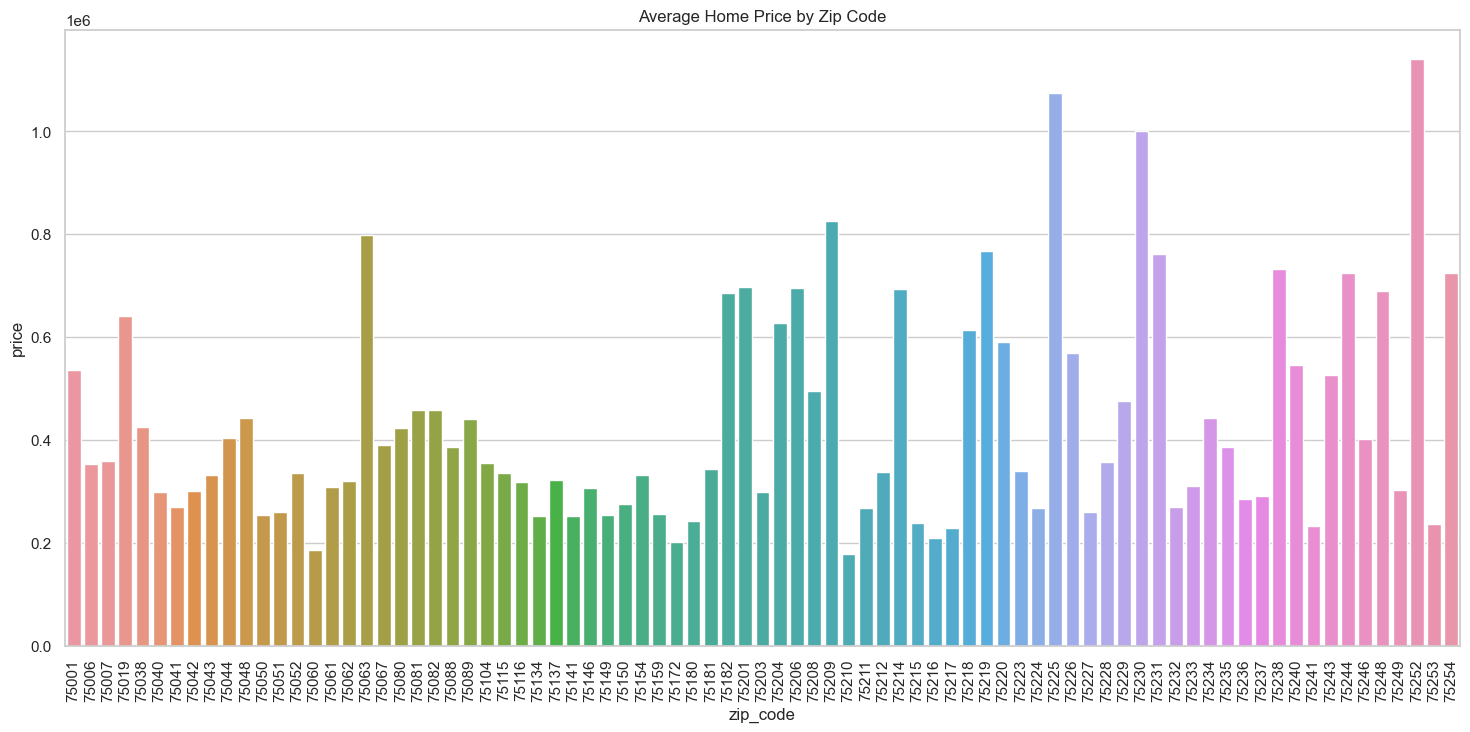

In [257]:
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(18,8))

sns.barplot(x='zip_code', y='price', data=data_zip_ordered)
plt.xticks(rotation = 90)
plt.title('Average Home Price by Zip Code')

In [258]:
# cleaning data for regression

data = data.drop(['sq_ft_lot', 'zip_code'], axis=1)


In [259]:
data.head()

,beds,baths,year_built,sq_ft_interior,price
0,3,1.5,1966,1356,241183
1,3,1.0,1955,1454,218014
2,3,2.0,1972,1392,241089
3,3,1.0,1957,1313,205940
4,5,2.0,2004,1504,275611


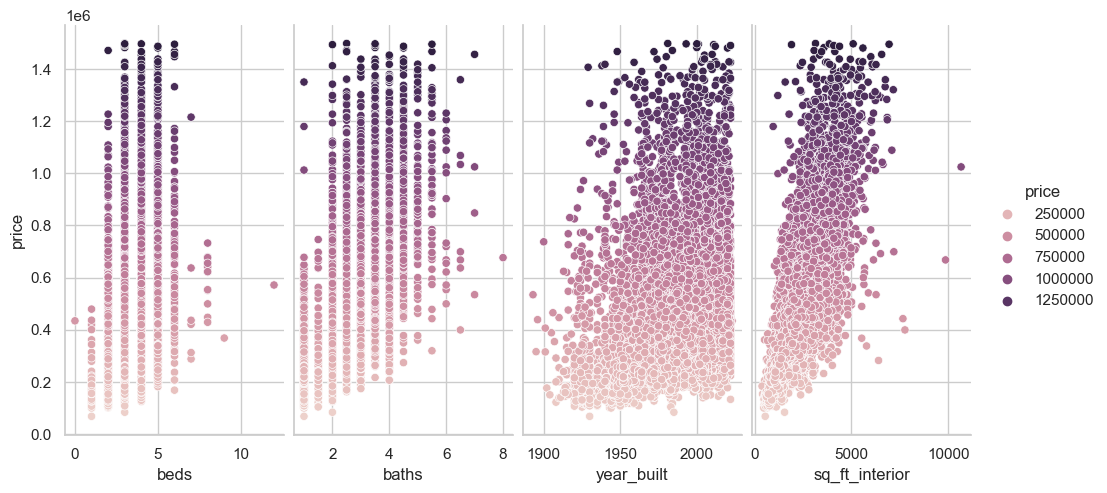

In [260]:
sns.pairplot(data, x_vars=['beds', 'baths', 'year_built', 'sq_ft_interior'], y_vars='price', height=5, aspect=0.5, hue='price')

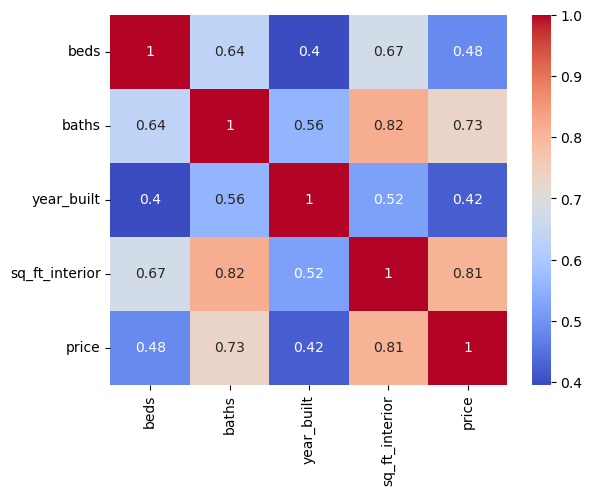

In [186]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# OLS and training model

In [122]:
# model and fit the data for OLS regression
X = data[['beds', 'baths', 'year_built', 'sq_ft_interior']]
y = data['price']
X = sm.add_constant(X)
est = sm .OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:02:26   Log-Likelihood:            -4.2662e+05
No. Observations:               32929   AIC:                         8.533e+05
Df Residuals:                   32924   BIC:                         8.533e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.684e+05   6.43e+04      8.841      0.000    4.42e+05    6.94e+05
beds           -3.579e+04   1078.199    -33.196      0.000   -3.79e+04   -3.37e+04
baths           5.739e+04   1300.937     44.113      0.000    5.48e+04    5.99e+04
year_built      -259.9099     32.995     -7.877      0.000    -324.580    -195.239
sq_ft_interior   159.5953      1.261    126.545      0.000     157.123     162.067
==============================================================================
Omnibus:                    15165.345   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301350.174
Skew:                           1.740   Prob(JB):                         0.00
Kurtosis:                      17.406   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [143]:
y_train.shape

(23050,)

In [144]:
y_test.shape

(9879,)

In [145]:
reg_model = LinearRegression().fit(X_train, y_train)

In [146]:
# print coefficients
print('Intercept: ', reg_model.intercept_)

list(zip(X, reg_model.coef_))

Intercept:  538950.1857844021


[('const', 0.0),
 ('beds', -35609.35954910006),
 ('baths', 53942.86685100557),
 ('year_built', -244.33303102786613),
 ('sq_ft_interior', 162.55865876471944)]

In [148]:
# predicting test and train set result
y_pred = reg_model.predict(X_test)
x_pred = reg_model.predict(X_train)

In [149]:
print('Prediction for test set: {}'.format(y_pred))

Prediction for test set: [485341.07711073 503004.47409593 497134.66529337 ... 798610.27034723
 292262.62184455 350553.26716948]


In [150]:
reg_model_diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
reg_model_diff

,Actual Value,Predicted Value
768,336075,485341.077111
15242,664247,503004.474096
3872,383012,497134.665293
21392,302542,339821.425434
5130,332426,422379.999471
...,...,...
30279,329864,359312.520606
22867,267879,305014.070743
17674,744252,798610.270347
6047,311266,292262.621845


In [151]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', r2)

Mean Absolute Error: 62633.89143881648
Mean Squared Error: 10096156682.81873
Root Mean Squared Error: 100479.63317418475


In [155]:
# try again with a normalized dataset
norm_data = preprocessing.normalize(data)
norm_df = pd.DataFrame(norm_data, columns= data.columns)
norm_df

,beds,baths,year_built,sq_ft_interior,price
0,0.000012,0.000006,0.008151,0.005622,0.999951
1,0.000014,0.000005,0.008967,0.006669,0.999938
2,0.000012,0.000008,0.008179,0.005774,0.999950
3,0.000015,0.000005,0.009502,0.006375,0.999935
4,0.000018,0.000007,0.007271,0.005457,0.999959
...,...,...,...,...,...
32924,0.000007,0.000007,0.006966,0.004730,0.999965
32925,0.000013,0.000009,0.008786,0.007904,0.999930
32926,0.000013,0.000006,0.008536,0.004311,0.999954
32927,0.000014,0.000007,0.008873,0.004771,0.999949


In [165]:
X_norm = norm_df[['beds', 'baths', 'year_built', 'sq_ft_interior']]
y_norm = norm_df['price']
X_norm = sm.add_constant(X)
est = sm .OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 1.163e+05
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:36:12   Log-Likelihood:             3.5569e+05
No. Observations:               32929   AIC:                        -7.114e+05
Df Residuals:                   32924   BIC:                        -7.113e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0000   1.39e-07   7.21e+06      0.000       1.000       1.000
beds               0.6270      0.016     40.062      0.000       0.596       0.658
baths              0.4043      0.019     21.600      0.000       0.368       0.441
year_built        -0.0076   1.92e-05   -394.343      0.000      -0.008      -0.008
sq_ft_interior    -0.0062   2.71e-05   -228.720      0.000      -0.006      -0.006
==============================================================================
Omnibus:                    52721.212   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        140879125.006
Skew:                          -9.880   Prob(JB):                         0.00
Kurtosis:                     322.825   Cond. No.                     7.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size = 0.3, random_state = 100)

In [169]:
y_train_norm.shape

(23050,)

In [170]:
y_test_norm.shape

(9879,)

In [171]:
reg_model_norm = LinearRegression().fit(X_train_norm, y_train_norm)

In [172]:
# print coefficients
print('Intercept: ', reg_model_norm.intercept_)

list(zip(X, reg_model_norm.coef_))

Intercept:  1.000034216567093


[('const', 0.0),
 ('beds', 0.6545584269939522),
 ('baths', 0.38246072723050606),
 ('year_built', -0.007609421714599995),
 ('sq_ft_interior', -0.006105034261819797)]

In [173]:
# predicting test and train set result
y_pred_norm = reg_model.predict(X_test_norm)
x_pred_norm = reg_model.predict(X_train_norm)

In [174]:
print('Prediction for test set: {}'.format(y_pred_norm))

Prediction for test set: [538950.02627804 538950.13167022 538950.07661288 ... 538950.53466478
 538949.39327938 538949.27246385]


In [175]:
reg_model_diff_norm = pd.DataFrame({'Actual Value': y_test_norm, 'Predicted Value': y_pred_norm})
reg_model_diff_norm

,Actual Value,Predicted Value
767,0.999944,538950.026278
15159,0.999985,538950.131670
3837,0.999964,538950.076613
21221,0.999963,538949.527623
5093,0.999963,538949.835132
...,...,...
30009,0.999962,538949.641224
22670,0.999955,538949.312533
17514,0.999980,538950.534665
6007,0.999969,538949.393279


In [176]:
mae_norm = metrics.mean_absolute_error(y_test_norm, y_pred_norm)
mse_norm = metrics.mean_squared_error(y_test_norm, y_pred_norm)
r2_norm = np.sqrt(metrics.mean_squared_error(y_test_norm, y_pred_norm))

print('Mean Absolute Error:', mae_norm)
print('Mean Squared Error:', mse_norm)
print('Root Mean Squared Error:', r2_norm)

Mean Absolute Error: 538948.5041171053
Mean Squared Error: 290465490090.4184
Root Mean Squared Error: 538948.5041174327
